If on mac, I had to do this:

```bash
$ brew install graphviz  # had to upgrade graphviz on el capitan
```

Then

```bash
$ pip install lolviz
```

In [1]:
from lolviz import *

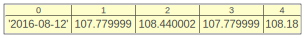

In [2]:
objviz(['2016-08-12',107.779999,108.440002,107.779999,108.18])

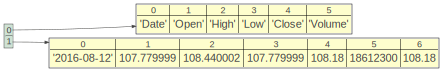

In [3]:
table = [
    ['Date','Open','High','Low','Close','Volume'],
    ['2016-08-12',107.779999,108.440002,107.779999,108.18,18612300,108.18],
]
objviz(table)

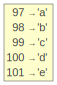

In [4]:
d = dict([(c,chr(c)) for c in range(ord('a'),ord('f'))])
objviz(d)

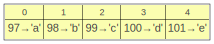

In [17]:
tuplelist = d.items()
listviz(tuplelist)

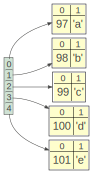

In [6]:
tuplelist = d.items()
objviz(tuplelist)

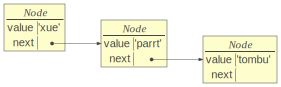

In [7]:
# test linked list node
class Node:
    def __str__(self):
        return "Node(%s,%s)" % (self.value, str(self.next))

    def __repr__(self):
        return str(self)

    def __init__(self, value, next=None):
        self.value = value
        self.next = next

head = Node('tombu')
head = Node('parrt', head)
head = Node("xue", head)
g = llistviz(head)
# or
g = llistviz(head, valuefield='value', nextfield='next')
# or
g = llistviz(head, value=lambda p:p.value, next=lambda p:p.next)
objviz(head)

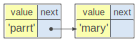

In [8]:
head2 = ('parrt',('mary',None))
llistviz(head2, value=lambda p:p[0], next=lambda p:p[1])

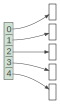

In [18]:
table = [ [], [], [], [], [] ]
objviz(table)

hashcode = 97
bucket_index = 2


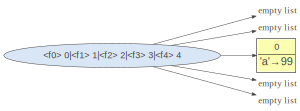

In [10]:
key = 'a'
value = 99
def hashcode(o): return ord(o) # assume keys are single-element strings
print "hashcode =", hashcode(key)
bucket_index = hashcode(key) % len(table)
print "bucket_index =", bucket_index
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

hashcode = 102
bucket_index = 2


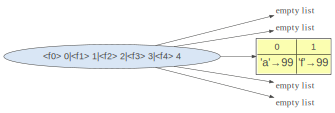

In [11]:
key = 'f'
value = 99
print "hashcode =", hashcode(key)
bucket_index = hashcode(key) % len(table)
print "bucket_index =", bucket_index
bucket = table[bucket_index]
bucket.append( (key,value) ) # add association to the bucket
lolviz(table)

4405572024 4405572024


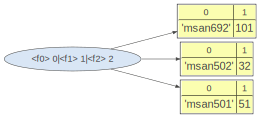

In [12]:
courses = [
    ['msan501', 51],
    ['msan502', 32],
    ['msan692', 101]
]
mycourses = courses
print id(mycourses), id(courses)
lolviz(courses)

You can also display strings as arrays in isolation (but not yet in other data structures):

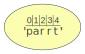

In [13]:
strviz('parrt')